## Supervised Learning with scikit-learn - Part 2
## Part 2 - Regression

In [3]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Introduction to Regression
Predicting blood glucose levels

In [27]:
import pandas as pd
df = pd.read_csv("datasets/diabetes_clean.csv", index_col=None)
df.head()

,Unnamed: 0,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


Creating feature and targets arrays

In [31]:
# Clean where the glucose and bmi is '0'
diabetes_df = df.loc[(df['glucose'] != 0) & (df['bmi'] != 0)].copy()

# Create independent and dependent variables
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [32]:
X_bmi = X[:, 5]
print(y.shape, X_bmi.shape)

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(752,) (752,)
(752, 1)


Plotting glucose vs body mass index (bmi)

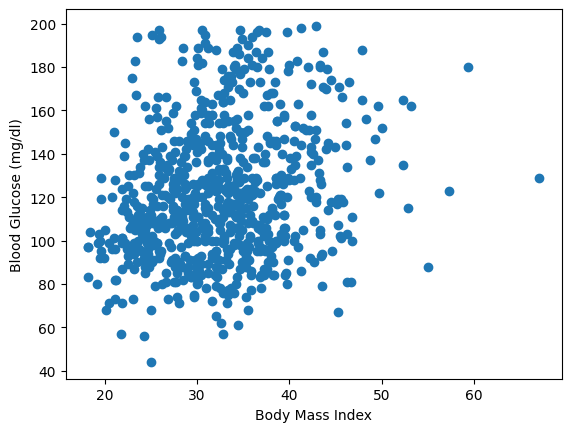

In [40]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

Fitting a regression model


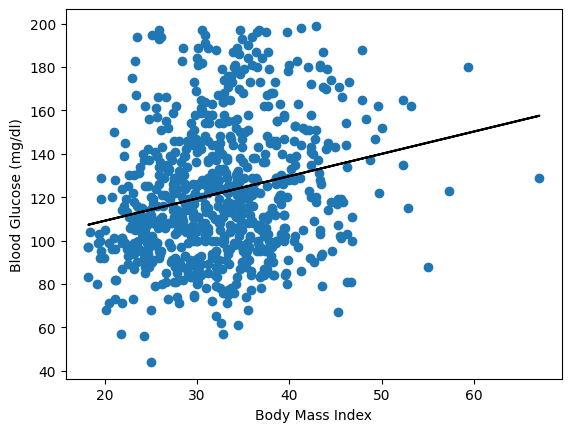

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='black')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Exercise - Creating features

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

In [46]:
sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')
sales_df.head(2)

,Unnamed: 0,tv,radio,social_media,sales
0,0,16000.0,6566.23,2907.98,54732.76
1,1,13000.0,9237.76,2409.57,46677.90


You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [47]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = np.reshape(X, (4546,1))

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Exercise - Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test setows:

In [48]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Exercise - Visualizing a  linear regression model

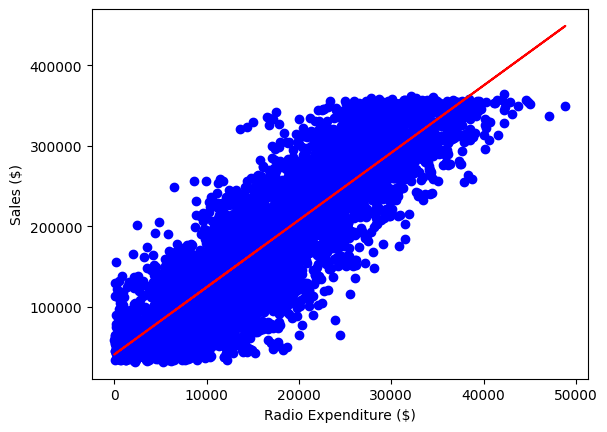

In [49]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## The Basic of Linear Regression
Linear regression using all features

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
features = ["tv",	"radio",	"social_media"]
X = sales_df[features].values
y = sales_df['sales'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Make linear regression model
reg_all = LinearRegression()

# Fit the data
reg_all.fit(X_train, y_train)

# Predict
y_pred = reg_all.predict(X_test)

R-squared: quantifies the variance in target values explained by the features (independent variables)
- Values range from 0 to 1
  
Mean squared error (MSE): is measured in target units, squared.

Root mean squared error: Measure RMSE in the same units at the target variable

In [58]:
# R-squared in scikit-learn
print(reg_all.score(X_test, y_test))

# Or use the r2_score function
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9990152104759368
0.9990152104759368


In [59]:
# RMSE in scikit-learn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2944.4331996001015

### Exercise - Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows

You will then use this model to predict sales based on the values of the test features.

In [62]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [334497.27770911 124568.85781018], Actual Values: [330640.84 129596.95]


### Exercise - Regression Performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

In [63]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Compute R-squared
r_squared = reg.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)
# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("R^2: {}".format(r2))
print("RMSE: {}".format(rmse))

R^2: 0.9990384167447777
R^2: 0.9990384167447777
RMSE: 2914.151419306545


## Cross-validation
The motivation

Model performance is dependent on the way we split up the data

Not representative of the model's ability to generalize to unseen data

In [81]:
# Create X and y array
X = sales_df.set_index('Unnamed: 0').drop('sales', axis=1).values
y = sales_df['sales'].values
print(X.shape)

# Cross-validation
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

(4546, 3)


Evaluating cross-validation performance

In [80]:
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
0.9989911695584723 3.895599514495595e-05
[0.99893558 0.99905335]


### Exercise - Cross Validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

In [85]:
# Create X and y array
X = sales_df[['radio','social_media']].values
y = sales_df['sales'].values

In [86]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


### Exercise - Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercis.
s.

In [88]:
import numpy as np
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(cv_results.std())

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.9989911695584723
3.895599514495595e-05
[0.99893558 0.99905335]


## Regularized Regression

Ridge in scikit-learn

In [90]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [93]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

print('Performance get worse as alpha increases.')

[0.3206256929133715, 0.3208695598264344, 0.32141804333867485, 0.2892647846260761, 0.2109609794448799]
Performance get worse as alpha increases.


Lasso in scikit-learn

In [94]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    
print(scores)

[0.321009964437741, 0.3249801634795382, 0.1836190263257632, 0.16860056295031767, 0.1332457055140216]


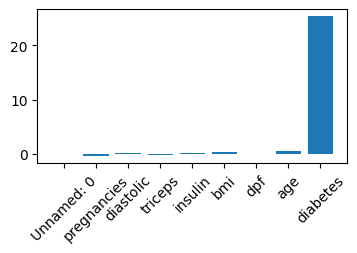

In [104]:
# Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.figure(figsize=(4,2))
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### Exercise - Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scon of ridge.

In [107]:
# Create X and y arrays
X = sales_df.drop(["sales","Unnamed: 0"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)

(3182, 3)


In [108]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


### Exercise - Lasso regression for feature importance

[ 3.56256962 -0.00397035  0.00496385]


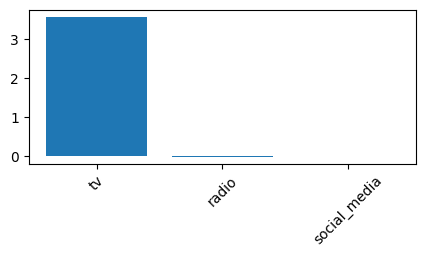

In [111]:
sales_columns = ['tv', 'radio', 'social_media'] 
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.figure(figsize=(5,2))
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()